## Audio I

In [7]:
#!sudo apt-get install libportaudio2
!pip install sounddevice

#Librería para grabar
import sounddevice as sd

#Para reproducir audio en la Jupyter N.
from IPython.display import Audio, display

#Funciones para señales
import scipy.signal

#Herramientas numéricas
import numpy as np

#Para plotear
import matplotlib.pyplot as plt

#'inline' para evitar el o de "plt.show()"
#'notebook' para que sea también interactivo
%matplotlib notebook

In [8]:
def grabar(sampleo = 44100, duracion = 5, play = False):
    '''Graba audio y devuelve la data como array de numpy.'''
    
    rec = sd.rec(duracion * sampleo, samplerate=sampleo, channels=2,dtype='float64')
    print("Recording Audio...")    
    sd.wait()
    
    print("Audio recording complete.")
    if play:
        sd.play(rec, sampleo)
        sd.wait()
        print("Playing audio...")
    return rec

In [9]:
def plot_welch(t, canal = 0):
    '''Calcula y plotea un welch sobre la señal t'''
    
    f, pxx = scipy.signal.welch(t[:,canal], fs = 44100)
    plt.plot(f, pxx)
    plt.xlim(0, 10000)
    plt.xlabel('Frecuencias')

In [10]:
def plot_multiple(w, fs = 44100):
    '''Plotea primero la onda en dominio de tiempo, luego el espectro (FFT) y luego el espectrograma'''
    
    #Creo el espacio para plotear, una "figura" vacia
    plt.figure(figsize=(15,15))

    #Dividido en 3 filas y 1 columna, ploteo la onda en el 1er espacio
    plt.subplot(3, 1, 1)
    plt.plot(w)
    
    #Pongo titulo al eje y
    plt.ylabel('Amplitude')
    #Grilla de fondo
    plt.grid()
    
    #FFT
    #n = len(w) = duración * framerate
    n = len(w)
    Y = np.fft.rfft(w) / n 
    freqs = np.fft.fftfreq(n, d= 1/44100)
    
    #Plot FFT
    plt.subplot(3, 1, 2)
    #Ploteo las frecuencias positivas y sus valores, con un color RGBA
    plt.plot(freqs[:10000], abs(Y[:10000]), c = [0.9, 0.2, 0.1, 0.8])
    plt.xlabel('Freq (Hz)')
    
    #Marco en el eje X ciertos valores incluyendo la frecuencia de máximo valor
    plt.xticks(np.sort(np.append(freqs[:10000:1000], freqs[np.argmax(abs(Y[:10000]))])), rotation = 60)
    plt.ylabel('|Y(freq)|')

    #Espectrograma
    plt.subplot(3, 1, 3)
    Pxx, freqs, bins, im = plt.specgram(w, Fs=fs, noverlap=10, cmap= 'coolwarm')
    plt.ylim(0, 8000)
    plt.ylabel('Freq')
    plt.xlabel('Time')
    plt.show()

Recording Audio
Audio recording complete, playing audio
Play Audio Complete


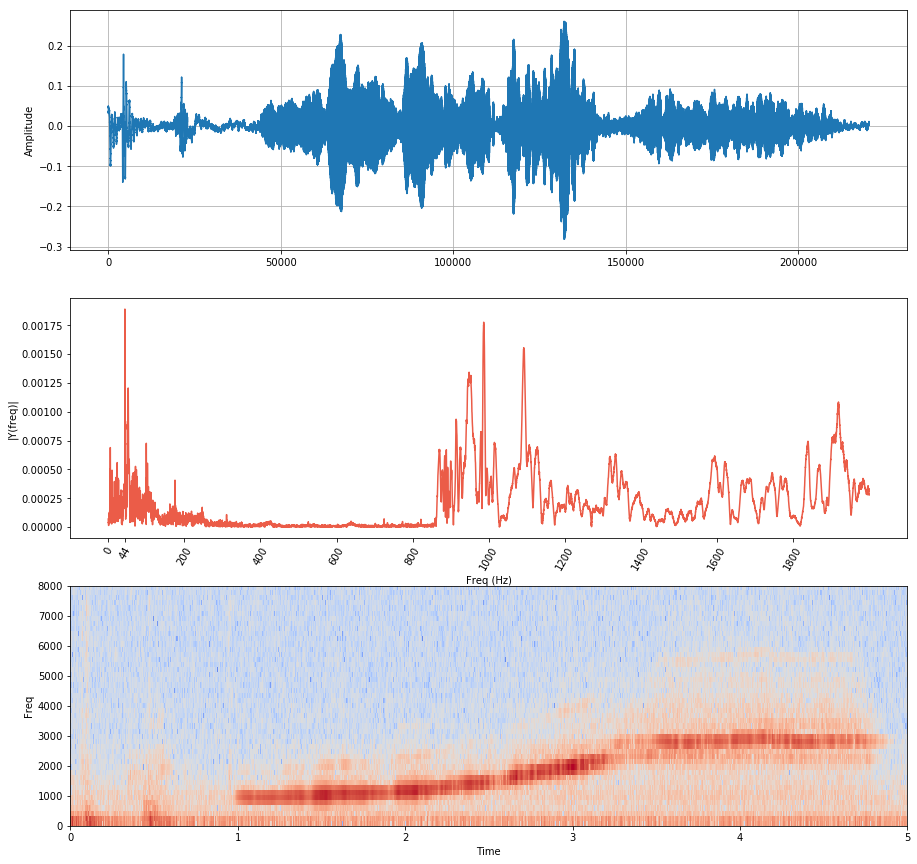

In [13]:
#Promedio los dos canales
rec0 = grabar()
prom = (rec0[:,0] + rec0[:,1]) / 2 

plot_multiple(prom)